# Video game sales analysis


### EDA on video game sales analysis 

In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns

Importing the dataset

In [2]:
df = pd.read_csv('video_game_sales.csv')

Displaying the head of df to see how the data looks like

In [3]:
df.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


Alright so we have 11 columns:
1. Rank - The ranking based on overall sales which are Global_Sales
2. Name - The name of the video game 
3. Platform - The platform for which the video games has been sold (it's interesting to see whether games where sold on multiple platforms or not)
4. Year - The year the game was introduced 
5. Genre - The genre of the game 
6. Publisher - Which company published the game
7. NA_Sales - Sales in North America in million
8. EU_Sales - Sales in Europe in million
9. JP_Sales - Sales in Japan in million
10. Other_Sales - Sales in remaining continents/countries in million
11. Global_Sales - Overall sales which is the sum of NA_Sales, EU_Sales, JP_Sales & Other_Sales



#### In the next step let's check the data for any irregularities and clean it 

I often get mistakes when typing the column names with upper and lower cases.
So let's change the column names to lower case

In [4]:
df.columns= df.columns.str.lower()
df.columns

Index(['rank', 'name', 'platform', 'year', 'genre', 'publisher', 'na_sales',
       'eu_sales', 'jp_sales', 'other_sales', 'global_sales'],
      dtype='object')

Perfect now I don't have to keep in mind what part is a capital letter 

Next let's check the column types

In [5]:
df.dtypes

rank              int64
name             object
platform         object
year            float64
genre            object
publisher        object
na_sales        float64
eu_sales        float64
jp_sales        float64
other_sales     float64
global_sales    float64
dtype: object

Everything looks fine.
We could transform the year to datetime, bt then it would add month and day. This would look like this "2006-01-01".
Since wee can sort or group by float we can run the analysis without transforming. TBH adding january 1st in each case would confuse me, since it doesn't bring any value for our analysis.



What about missing values?

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   rank          16598 non-null  int64  
 1   name          16598 non-null  object 
 2   platform      16598 non-null  object 
 3   year          16327 non-null  float64
 4   genre         16598 non-null  object 
 5   publisher     16540 non-null  object 
 6   na_sales      16598 non-null  float64
 7   eu_sales      16598 non-null  float64
 8   jp_sales      16598 non-null  float64
 9   other_sales   16598 non-null  float64
 10  global_sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


It seems like we have some missing values in year and publisher
But let's check how manz missing values per column we have

In [7]:
print(df.isnull().sum())
mv = df.year.isnull().sum()/len(df.year)*100
print("for the column with most missing values (year), it is just", round(mv,2), "%")

rank              0
name              0
platform          0
year            271
genre             0
publisher        58
na_sales          0
eu_sales          0
jp_sales          0
other_sales       0
global_sales      0
dtype: int64
for the column with most missing values (year), it is just 1.63 %


Hmmm... seems like it's really not a lot. 
Let's leave the data inside and just remember for analysis of yearly sales & sales by publisher that very few data will be missing.
In case of missing data in sales we could fill the gaps with median or average values but for publisher and year it doesn't make sense.
But lets dig deeper into the missing values, maybe there's something we can do.


In [8]:
null_data = df[df.isnull().any(axis=1)]
null_data

,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
179,180,Madden NFL 2004,PS2,NaN,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23
377,378,FIFA Soccer 2004,PS2,NaN,Sports,Electronic Arts,0.59,2.36,0.04,0.51,3.49
431,432,LEGO Batman: The Videogame,Wii,NaN,Action,Warner Bros. Interactive Entertainment,1.86,1.02,0.00,0.29,3.17
470,471,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1.57,1.02,0.00,0.41,3.00
607,608,Space Invaders,2600,NaN,Shooter,Atari,2.36,0.14,0.00,0.03,2.53
...,...,...,...,...,...,...,...,...,...,...,...
16427,16430,Virtua Quest,GC,NaN,Role-Playing,Unknown,0.01,0.00,0.00,0.00,0.01
16493,16496,The Smurfs,3DS,NaN,Action,Unknown,0.00,0.01,0.00,0.00,0.01
16494,16497,Legends of Oz: Dorothy's Return,3DS,2014.0,Puzzle,NaN,0.00,0.01,0.00,0.00,0.01
16543,16546,Driving Simulator 2011,PC,2011.0,Racing,NaN,0.00,0.01,0.00,0.00,0.01


For publisher we have the label 'Unknown' and NaN. 
So let's fill the NaN with 'Unknown'as the publicher is not known

In [9]:
df['publisher'] = df['publisher'].replace(np.nan, 'Unknown')
print(df.isnull().sum())

rank              0
name              0
platform          0
year            271
genre             0
publisher         0
na_sales          0
eu_sales          0
jp_sales          0
other_sales       0
global_sales      0
dtype: int64


This looks better!

Let's have an overview over the numerical columns for irregularieties

In [10]:
num_v = df[['rank', 'year', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales','global_sales']]
num_v.describe()

,rank,year,na_sales,eu_sales,jp_sales,other_sales,global_sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


For me there are no odd numbers

1. rank - range goes from 1 to 16600, no negative values
2. year - The eraliest published game was in 1980 and the latest in 2020. 
   Interesting to see that it took 27 years to publish as many games as in the 13 years following
   But lets analyse things deeper later on 
3. sales - Also no odd things to see, like negative values
   But, it's interesting to see that at least 75% of games (probably more, lets analyse it later) doesn't break the threshold of 1 million sales.

by year

In [19]:
g_published_y = df.groupby('year').name.count()
type(g_published_y)

pandas.core.series.Series

c:\Users\wh\anaconda3_python\envs\keras\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='year'>

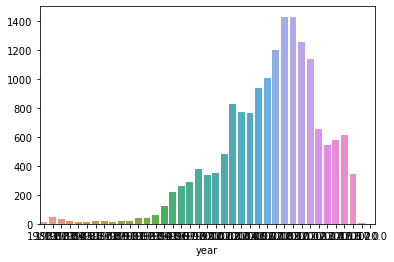

In [20]:
sns.barplot(g_published_y.index, g_published_y.values)

by category

by publisher

development over time for category per given area --> trends